In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics


In [75]:
dataset = pd.read_excel("/Users/user/Documents/GitHub/Crime-Prediction/Dataset/crp.xlsx", sheet_name="Sheet1")

In [76]:
dataset

,Year,City,Population (in Thousand) (2011)+,Criminal damage and arson,Drug offences,Miscellaneous crimes against society,Possession of weapons,Public order offences,Robbery,Sexual offences,Theft offences,Violence against the person
0,2014,Avon and Somerset,1720.0,14243,4140,1078,386,5676,922,2279,48881,20384
1,2015,Avon and Somerset,1720.0,14956,3689,1597,485,10032,1004,3381,53151,31476
2,2016,Avon and Somerset,1720.0,15435,3829,1921,623,17699,1195,3949,55478,39829
3,2017,Avon and Somerset,1720.0,16212,3252,1935,726,17793,1375,4480,53301,41133
4,2018,Avon and Somerset,1720.0,15287,2989,1908,838,17387,1494,4313,49736,42967
...,...,...,...,...,...,...,...,...,...,...,...,...
147,2017,Kent,1800.3,22680,2701,4458,1089,15450,1567,6518,56004,65617
148,2018,Kent,1800.3,22741,3104,5407,1363,20551,1994,7177,58349,79770
149,2019,Kent,1800.3,22509,3948,5672,1648,15533,1874,6666,57740,75114
150,2020,Kent,1800.3,20031,4596,5749,1236,13946,1223,5676,37764,76907


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  152 non-null    int64  
 1   City                                  152 non-null    object 
 2   Population (in Thousand) (2011)+      152 non-null    float64
 3   Criminal damage and arson             152 non-null    int64  
 4   Drug offences                         152 non-null    int64  
 5   Miscellaneous crimes against society  152 non-null    int64  
 6   Possession of weapons                 152 non-null    int64  
 7   Public order offences                 152 non-null    int64  
 8   Robbery                               152 non-null    int64  
 9   Sexual offences                       152 non-null    int64  
 10  Theft offences                        152 non-null    int64  
 11  Violence against th

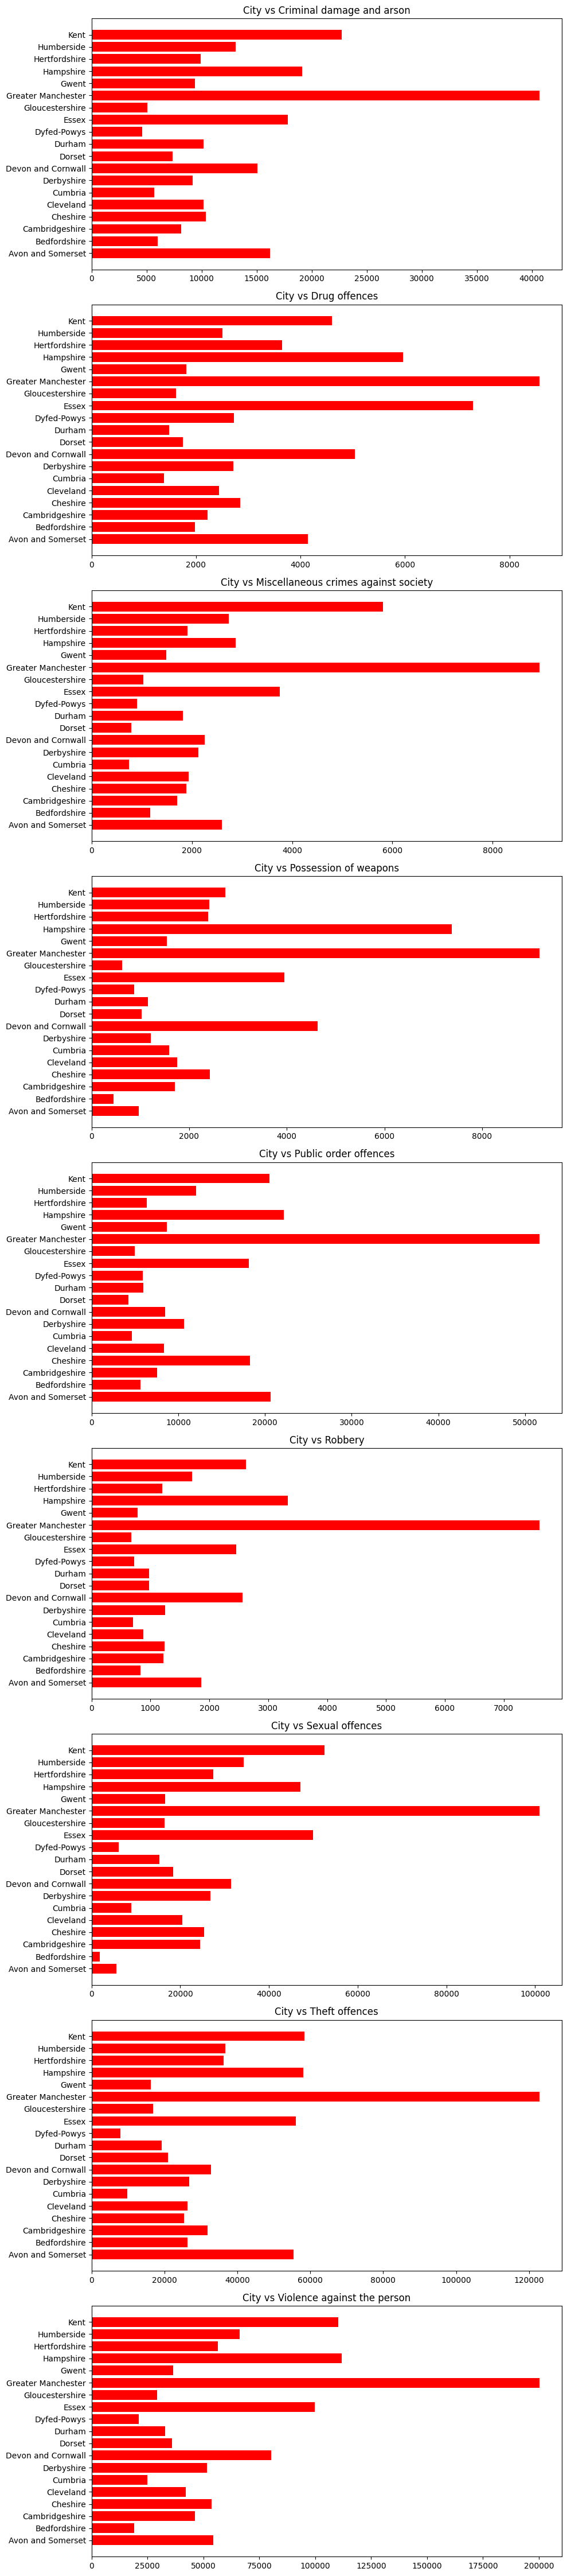

In [98]:
import matplotlib.pyplot as plt

num_crime_categories = len(dataset.columns) - 3  # Number of crime categories excluding 'Year' and 'City'
fig, ax = plt.subplots(num_crime_categories, 1, figsize=(10, 5*num_crime_categories))

crime_columns = dataset.columns[3:]  # Exclude 'Year' and 'City' columns
for i in range(num_crime_categories):
    ax[i].barh(dataset['City'], dataset[crime_columns[i]], color='Red')
    ax[i].set_title('City vs ' + crime_columns[i])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [109]:
import pandas as pd

new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Thousand) (2011)+', 'Number Of Cases', 'Type'])

for i in range(3, 12):
    temp = dataset[['Year', 'City', 'Population (in Thousand) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[dataset.columns[i]]
    temp['Type'] = dataset.columns[i]
    
    # Check if temp contains any non-null values
    if not temp.dropna(subset=['Year', 'City', 'Population (in Thousand) (2011)+', 'Number Of Cases', 'Type']).empty:
        new_df = pd.concat([new_df, temp])

# Reset index after concatenation
new_df.reset_index(drop=True, inplace=True)



/var/folders/79/98lym5616v132hrh8t54trt40000gn/T/ipykernel_2183/2306387793.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp])


In [112]:
new_df

,Year,City,Population (in Thousand) (2011)+,Number Of Cases,Type
0,2014,Avon and Somerset,1720.0,14243,Criminal damage and arson
1,2015,Avon and Somerset,1720.0,14956,Criminal damage and arson
2,2016,Avon and Somerset,1720.0,15435,Criminal damage and arson
3,2017,Avon and Somerset,1720.0,16212,Criminal damage and arson
4,2018,Avon and Somerset,1720.0,15287,Criminal damage and arson
...,...,...,...,...,...
1363,2017,Kent,1800.3,65617,Violence against the person
1364,2018,Kent,1800.3,79770,Violence against the person
1365,2019,Kent,1800.3,75114,Violence against the person
1366,2020,Kent,1800.3,76907,Violence against the person


In [114]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Thousand) (2011)+']

In [115]:
new_df

,Year,City,Population (in Thousand) (2011)+,Number Of Cases,Type,Crime Rate
0,2014,Avon and Somerset,1720.0,14243,Criminal damage and arson,8.280814
1,2015,Avon and Somerset,1720.0,14956,Criminal damage and arson,8.695349
2,2016,Avon and Somerset,1720.0,15435,Criminal damage and arson,8.973837
3,2017,Avon and Somerset,1720.0,16212,Criminal damage and arson,9.425581
4,2018,Avon and Somerset,1720.0,15287,Criminal damage and arson,8.887791
...,...,...,...,...,...,...
1363,2017,Kent,1800.3,65617,Violence against the person,36.447814
1364,2018,Kent,1800.3,79770,Violence against the person,44.309282
1365,2019,Kent,1800.3,75114,Violence against the person,41.723046
1366,2020,Kent,1800.3,76907,Violence against the person,42.718991


In [116]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [117]:
new_df

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,Avon and Somerset,1720.0,Criminal damage and arson,8.280814
1,2015,Avon and Somerset,1720.0,Criminal damage and arson,8.695349
2,2016,Avon and Somerset,1720.0,Criminal damage and arson,8.973837
3,2017,Avon and Somerset,1720.0,Criminal damage and arson,9.425581
4,2018,Avon and Somerset,1720.0,Criminal damage and arson,8.887791
...,...,...,...,...,...
1363,2017,Kent,1800.3,Violence against the person,36.447814
1364,2018,Kent,1800.3,Violence against the person,44.309282
1365,2019,Kent,1800.3,Violence against the person,41.723046
1366,2020,Kent,1800.3,Violence against the person,42.718991


In [121]:
# Save the file
new_df.to_excel("/Users/user/Documents/GitHub/Crime-Prediction/Dataset/new_dataset.xlsx", index=False, sheet_name='Sheet1')

In [122]:
new_dataset = pd.read_excel("/Users/user/Documents/GitHub/Crime-Prediction/Dataset/new_dataset.xlsx", sheet_name="Sheet1")

In [123]:
new_dataset

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,Avon and Somerset,1720.0,Criminal damage and arson,8.280814
1,2015,Avon and Somerset,1720.0,Criminal damage and arson,8.695349
2,2016,Avon and Somerset,1720.0,Criminal damage and arson,8.973837
3,2017,Avon and Somerset,1720.0,Criminal damage and arson,9.425581
4,2018,Avon and Somerset,1720.0,Criminal damage and arson,8.887791
...,...,...,...,...,...
1363,2017,Kent,1800.3,Violence against the person,36.447814
1364,2018,Kent,1800.3,Violence against the person,44.309282
1365,2019,Kent,1800.3,Violence against the person,41.723046
1366,2020,Kent,1800.3,Violence against the person,42.718991


In [124]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1368 non-null   int64  
 1   City                              1368 non-null   object 
 2   Population (in Thousand) (2011)+  1368 non-null   float64
 3   Type                              1368 non-null   object 
 4   Crime Rate                        1368 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 53.6+ KB


In [125]:
new_dataset.describe()

,Year,Population (in Thousand) (2011)+,Crime Rate
count,1368.000000,1368.000000,1368.000000
mean,2017.500000,1128.705263,9.356010
std,2.292126,643.898070,12.778229
min,2014.000000,500.000000,0.054369
25%,2015.750000,576.700000,1.203418
50%,2017.500000,856.000000,2.878988
75%,2019.250000,1800.000000,13.153155
max,2021.000000,2700.000000,103.565637


In [126]:
le = LabelEncoder()

In [127]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [128]:
# Saving the mapping file for further use
file = open('/Users/user/Documents/GitHub/Crime-Prediction/Mapping/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Avon and Somerset - 0

Bedfordshire - 1

Cambridgeshire - 2

Cheshire - 3

Cleveland - 4

Cumbria - 5

Derbyshire - 6

Devon and Cornwall - 7

Dorset - 8

Durham - 9

Dyfed-Powys - 10

Essex - 11

Gloucestershire - 12

Greater Manchester - 13

Gwent - 14

Hampshire - 15

Hertfordshire - 16

Humberside - 17

Kent - 18



In [129]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [130]:
# Saving the mapping file for further use
file = open('/Users/user/Documents/GitHub/Crime-Prediction/Mapping/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Criminal damage and arson - 0

Drug offences - 1

Miscellaneous crimes against society - 2

Possession of weapons - 3

Public order offences - 4

Robbery - 5

Sexual offences - 6

Theft offences - 7

Violence against the person - 8



In [132]:
new_dataset

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,0,1720.0,0,8.280814
1,2015,0,1720.0,0,8.695349
2,2016,0,1720.0,0,8.973837
3,2017,0,1720.0,0,9.425581
4,2018,0,1720.0,0,8.887791
...,...,...,...,...,...
1363,2017,18,1800.3,8,36.447814
1364,2018,18,1800.3,8,44.309282
1365,2019,18,1800.3,8,41.723046
1366,2020,18,1800.3,8,42.718991


In [133]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2014. ,    0. , 1720. ,    0. ],
       [2015. ,    0. , 1720. ,    0. ],
       [2016. ,    0. , 1720. ,    0. ],
       ...,
       [2019. ,   18. , 1800.3,    8. ],
       [2020. ,   18. , 1800.3,    8. ],
       [2021. ,   18. , 1800.3,    8. ]])

In [134]:
y = new_dataset['Crime Rate'].values
y

array([ 8.28081395,  8.69534884,  8.97383721, ..., 41.72304616,
       42.71899128, 46.31839138])

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [136]:
x_train

array([[2.0210e+03, 3.0000e+00, 5.1800e+02, 0.0000e+00],
       [2.0180e+03, 2.0000e+00, 8.5600e+02, 8.0000e+00],
       [2.0210e+03, 1.2000e+01, 6.3700e+02, 5.0000e+00],
       ...,
       [2.0180e+03, 1.6000e+01, 1.5002e+03, 0.0000e+00],
       [2.0150e+03, 1.2000e+01, 6.3700e+02, 8.0000e+00],
       [2.0190e+03, 1.3000e+01, 2.7000e+03, 0.0000e+00]])

In [138]:
y_train

array([15.6988417 , 20.12733645,  0.47252747, ...,  5.98653513,
        9.65934066, 12.00703704])

In [139]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [140]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 7.341296042230958
Mean Squared Error: 176.69191628992758
R2 score: -0.19685637611418705


In [141]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 5.541824493743438
Mean Squared Error: 94.59761962609691
R2 score: 0.35922499120480245


In [144]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [145]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.1008296575710093
Mean Squared Error: 67.20007019402644
R2 score: 0.5448075148210594


In [146]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.6688671429989688
Mean Squared Error: 27.75463006357005
R2 score: 0.8119987226593459


In [148]:
import pickle

In [150]:
#saving the model as .pkl file
pkl_filename = "/Users/user/Documents/GitHub/Crime-Prediction/Model/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [151]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.8119987226593459
